# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [20]:
df.head()

,p1,p2
0,6.964692,7.943428
1,2.861393,5.099537
2,2.268515,0.974429
3,5.513148,4.474359
4,7.194690,8.938402


In [21]:
#Matriz de transformação
m = np.array([[ .5,.5],
              [ -1, 1]])

#Transformação linear
df['média'], df['diferença'] = np.matmul(m, df[['p1', 'p2']].to_numpy().transpose())

df.style.format(precision=2, decimal=',')


,p1,p2,média,diferença
0,"6,96","7,94","7,45","0,98"
1,"2,86","5,10","3,98","2,24"
2,"2,27","0,97","1,62","-1,29"
3,"5,51","4,47","4,99","-1,04"
4,"7,19","8,94","8,07","1,74"
5,"4,23","3,43","3,83","-0,80"
6,"9,81","9,84","9,82","0,03"
7,"6,85","7,92","7,38","1,07"
8,"4,81","5,70","5,25","0,89"
9,"3,92","5,68","4,80","1,75"


In [32]:
#Calcule a correlação entre os dados da p1 e p2

cor1 = round(df.p1.corr(df.p2), 3)
cor1

0.896

In [33]:
print("Correlação entre p1 e p2:", cor1)

Correlação entre p1 e p2: 0.896


In [34]:
#Calcule a correlação entre os dados transformados (média e diferença)

cor2 = round(df['média'].corr(df['diferença']), 3)
cor2

0.133

In [36]:
print("Correlação entre a média e a diferença:", cor2)

Correlação entre a média e a diferença: 0.133


**Comente as correlações observadas.**

- Correlação entre os dados das variáveis p1 e p2:

> A correlação de 0,896 demonstra uma forte correlação positiva entre as amostras das colunas p1 e p2. Isso significa que essas variáveis têm uma relação positiva, indicando uma forte associação e semelhança entre os dois conjuntos de dados. Podemos afirmar que os alunos mantém uma certa regularidade, aqueles que foram bem na primeira prova também foram na segunda e os que foram mal na primeira, também foram na segunda.

- Correlação entre os dados transformados (média e diferença):

> O valor resultante de 0,133 indica uma correlação relativamente baixa entre as variáveis transformadas. Isso significa que a média das notas de cada aluno e a diferença entre as notas (o quanto aumentou de uma pra outra) não estão tão correlacionadas assim. Alunos que apresentam média alta (foram bem nas duas provas) podem não apresentar uma diferença alta (as duas notas são altas, mas são parecidas). Já alunos que apresentam média mais baixa, pois não foram tão bem assim nas provas, pode apresentar uma diferença maior (foi melhor na segunda prova, mas como a nota da primeira já não era alta, a da segunda também não foi tão boa assim). 

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [39]:
#Matriz de transformação
s = np.array([ 1, 1])

#Transformação linear
df['soma'] = np.matmul(s, df[['p1', 'p2']].to_numpy().transpose())

df.style.format(precision=2, decimal=',')

,p1,p2,média,diferença,soma
0,"6,96","7,94","7,45","0,98","14,91"
1,"2,86","5,10","3,98","2,24","7,96"
2,"2,27","0,97","1,62","-1,29","3,24"
3,"5,51","4,47","4,99","-1,04","9,99"
4,"7,19","8,94","8,07","1,74","16,13"
5,"4,23","3,43","3,83","-0,80","7,66"
6,"9,81","9,84","9,82","0,03","19,64"
7,"6,85","7,92","7,38","1,07","14,77"
8,"4,81","5,70","5,25","0,89","10,51"
9,"3,92","5,68","4,80","1,75","9,60"


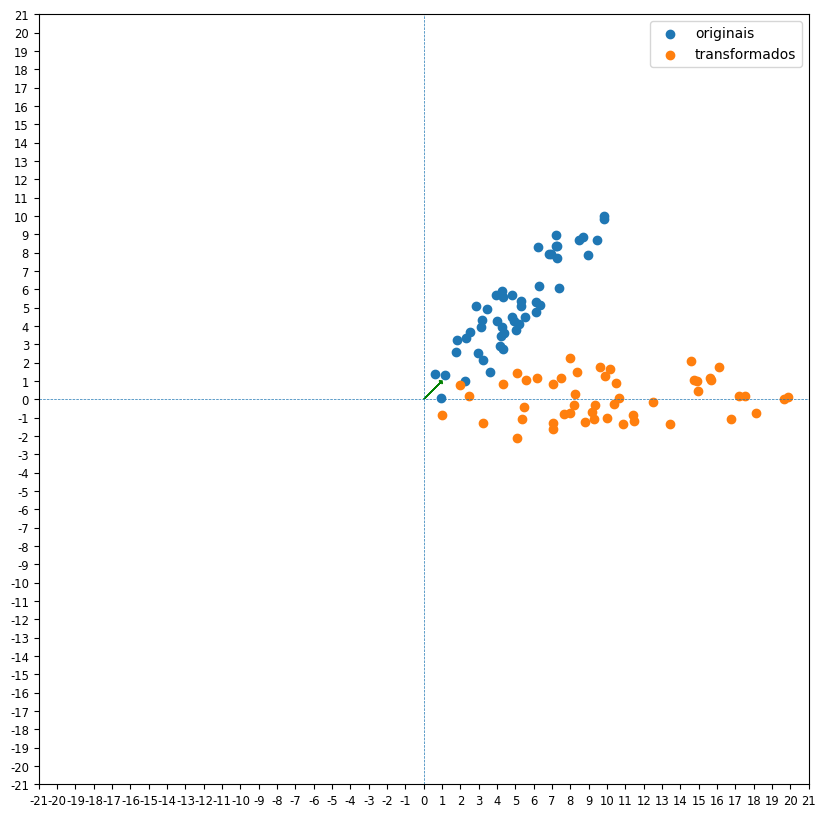

In [52]:
#Definindo figura e configurando eixos
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)

xmin = -21
xmax = 21
ymin = -21
ymax = 21

# ax.axis('equal')
ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

lista_xticks = list(range(int(xmin), int(xmax)+1))
ticksx = ax.set_xticks(lista_xticks)
labelsx = ax.set_xticklabels(lista_xticks, fontsize='small')

lista_yticks = list(range(int(ymin), int(ymax)+1))
ticksy = ax.set_yticks(lista_yticks)
labelsy = ax.set_yticklabels(lista_yticks, fontsize='small')

#Matriz de transformação
s = np.array([ 1, 1])

# Vetores coluna da matriz de transformação
ax.arrow(0, 0, s[0], s[1]
         , head_width=0.25
         , head_length=0.1
         , fc='g', ec='g', 
         length_includes_head=True)



#linhas horizontais e verticais de referência
ax.axvline(0, linewidth=.5, linestyle='--')
ax.axhline(0, linewidth=.5, linestyle='--')

#Transformação linear
np.matmul(s, df[['p1', 'p2']].to_numpy().transpose())

# Plotar os dados originais
plt.scatter(df['p1'], df['p2'], label='originais')

# Plotar os dados transformados
plt.scatter(df['soma'], df['diferença'], label='transformados')

#Legenda
plt.legend()

- A soma das notas apresenta distribuição parecida com os dados originais, já que há uma forte correlação entre p1 e p2 (como dito anteriormente, os alunos mantém uma certa regularidade), a soma das notas também segue essa regularidade. Alunos que foram bem nas duas provas vão apresentar o valor de soma maior, os que não foram muito bem nas duas apresentam valor de soma menor. 
- A média também apresentaria distribuição parecida, uma vez que é a metade da soma. Já a diferença (eixo y dos dados transformados) não apresenta a mesma distribuição e o motivo é o mesmo da baixa correlação com a média (discutido anteriormente). 